*Installing osmx for Open Street Map data*

In [1]:
pip install geopandas osmnx folium shapely rasterio matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 27.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import osmnx as ox
import folium
import rasterio

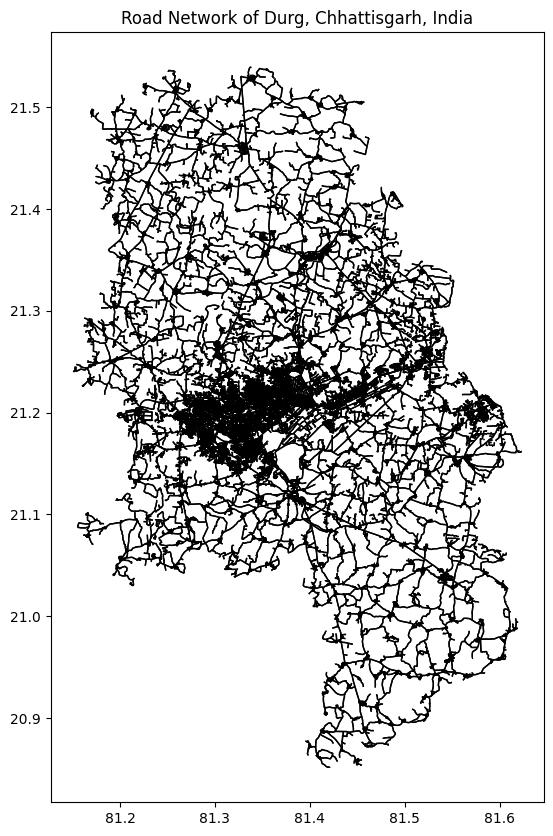

In [3]:
# Define the location (e.g., a rural area in India)
place_name = "Durg, Chhattisgarh, India"

# Download road network data
G = ox.graph_from_place(place_name, network_type='all')

# Convert the graph to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G)

# Plot the road network
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=1, edgecolor='black')
plt.title(f"Road Network of {place_name}")
plt.show()

In [5]:
# Display basic information about the road network data (edges)
print("Road Network Data Info:")
print(edges.info())  # Gives the column names, data types, and non-null counts

# Show the number of rows and columns
print(f"Number of rows and columns: {edges.shape}")

# Show the summary statistics of numerical columns
print("Summary statistics of numerical columns:")
print(edges.describe())

# For categorical columns, show value counts (e.g., road types)
print("Value counts for road types (highway column):")
print(edges['highway'].value_counts())

Road Network Data Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 141762 entries, (245693345, 8283230365, 0) to (12168126700, 12168126699, 0)
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   osmid     141762 non-null  object  
 1   highway   141762 non-null  object  
 2   oneway    141762 non-null  bool    
 3   reversed  141762 non-null  object  
 4   length    141762 non-null  float64 
 5   ref       901 non-null     object  
 6   geometry  141762 non-null  geometry
 7   name      1547 non-null    object  
 8   junction  234 non-null     object  
 9   lanes     516 non-null     object  
 10  maxspeed  280 non-null     object  
 11  bridge    2369 non-null    object  
 12  tunnel    58 non-null      object  
 13  access    406 non-null     object  
 14  width     2 non-null       object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 21.4+ MB
None
Number of rows and columns: (14

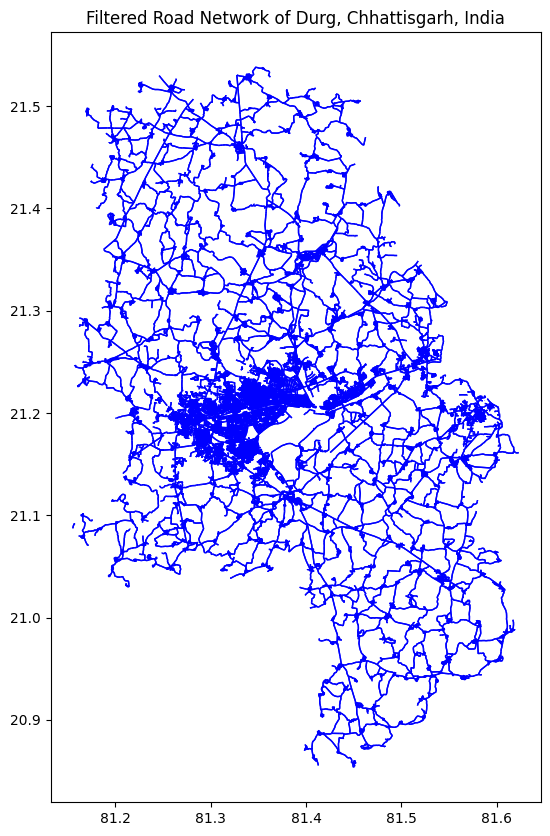

In [4]:
# Filter road types
roads = edges[edges['highway'].isin(['residential', 'unclassified', 'primary', 'secondary', 'tertiary'])]

# Plot the filtered road network
fig, ax = plt.subplots(figsize=(10, 10))
roads.plot(ax=ax, linewidth=1, edgecolor='blue')
plt.title(f"Filtered Road Network of {place_name}")
plt.show()

Number of Dead-End Nodes: 1
Number of Isolated Nodes: 0


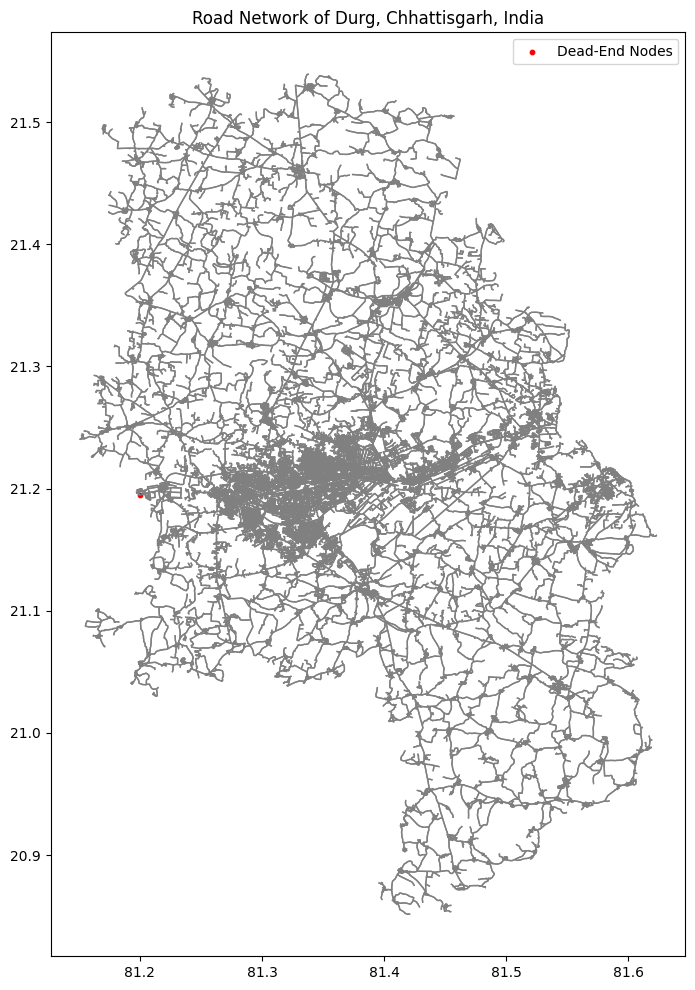

In [42]:
dead_end_nodes = [node for node, degree in dict(G.degree()).items() if degree == 1]
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]

# Convert lists to GeoDataFrames
dead_end_nodes_gdf = nodes.loc[nodes.index.isin(dead_end_nodes)]
isolated_nodes_gdf = nodes.loc[nodes.index.isin(isolated_nodes)]

# Plot the road network
fig, ax = plt.subplots(figsize=(12, 12))
edges.plot(ax=ax, linewidth=1, edgecolor='grey')

if not dead_end_nodes_gdf.empty:
    dead_end_nodes_gdf.plot(ax=ax, color='red', markersize=10, label='Dead-End Nodes', linestyle='None')

if not isolated_nodes_gdf.empty:
    isolated_nodes_gdf.plot(ax=ax, color='blue', markersize=10, label='Isolated Nodes', linestyle='None')

# set aspect ratio
ax.set_aspect('equal')

print(f"Number of Dead-End Nodes: {len(dead_end_nodes)}")
print(f"Number of Isolated Nodes: {len(isolated_nodes)}")

plt.title(f"Road Network of {place_name}")
plt.legend()
plt.show()

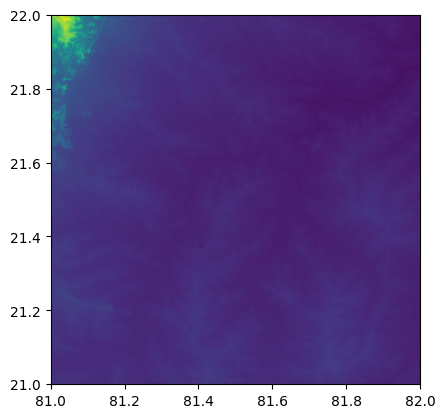

In [7]:
from rasterio.plot import show
from rasterio.mask import mask

# Load DEM data
dem_file = "/content/drive/MyDrive/n21_e081_1arc_v3.tif"

# Open DEM file
with rasterio.open(dem_file) as src:
    dem_data = src.read(1)
    show(src)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Number of Good Condition Roads: 63929
Number of Poor Condition Roads: 63928


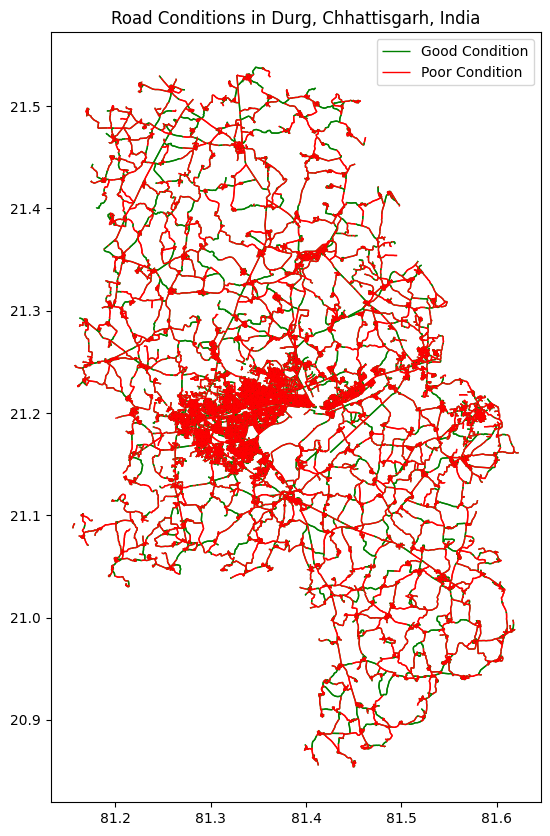

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Placeholder function to simulate road condition analysis
def detect_road_conditions(roads):
    # Assign a "condition"
    roads['condition'] = ['good' if i % 2 == 0 else 'poor' for i in range(len(roads))]
    return roads

# Analyze road conditions
roads = detect_road_conditions(roads)

# Count the number of good and poor quality roads
num_good_condition = roads[roads['condition'] == 'good'].shape[0]
num_poor_condition = roads[roads['condition'] == 'poor'].shape[0]

# Print the results
print(f"Number of Good Condition Roads: {num_good_condition}")
print(f"Number of Poor Condition Roads: {num_poor_condition}")

# Plot the roads with conditions
fig, ax = plt.subplots(figsize=(10, 10))
roads[roads['condition'] == 'good'].plot(ax=ax, color='green', linewidth=1, label='Good Condition')
roads[roads['condition'] == 'poor'].plot(ax=ax, color='red', linewidth=1, label='Poor Condition')
plt.legend()
plt.title(f"Road Conditions in {place_name}")
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


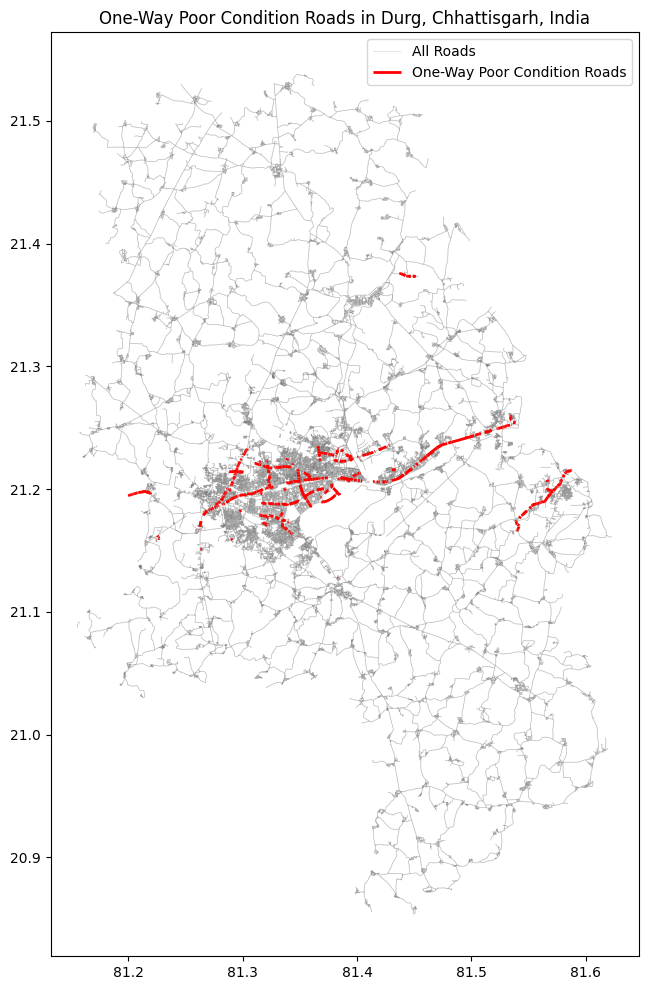

Number of One-Way Poor Condition Roads: 875


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Placeholder function to simulate road condition analysis
def detect_road_conditions(roads):
    # Assign a random "condition" status to each road for now
    roads['condition'] = ['good' if i % 2 == 0 else 'poor' for i in range(len(roads))]
    return roads

# Analyze road conditions
roads = detect_road_conditions(roads)

# Filter for one-way and poor condition roads
oneway_poor_condition_roads = roads[(roads['oneway'] == True) & (roads['condition'] == 'poor')]

# Plot the roads with conditions
fig, ax = plt.subplots(figsize=(12, 12))
# Optionally, plot all roads for context
roads.plot(ax=ax, color='grey', linewidth=0.5, label='All Roads', alpha=0.3)

# Highlight one-way poor condition roads in red
oneway_poor_condition_roads.plot(ax=ax, color='red', linewidth=2, label='One-Way Poor Condition Roads')

plt.legend()
plt.title(f"One-Way Poor Condition Roads in {place_name}")
plt.show()

# Print the number of one-way poor condition roads
print(f"Number of One-Way Poor Condition Roads: {len(oneway_poor_condition_roads)}")

In [10]:
# Extract 'u' and 'v' values (start and end nodes) from the geometry
oneway_poor_condition_roads['u'] = oneway_poor_condition_roads['geometry'].apply(lambda geom: geom.coords[0])  # start point
oneway_poor_condition_roads['v'] = oneway_poor_condition_roads['geometry'].apply(lambda geom: geom.coords[-1])  # end point

# Print the extracted 'u' and 'v' values for each road segment
for idx, row in oneway_poor_condition_roads.iterrows():
    print(f"Road Segment {idx}: Start (u) = {row['u']}, End (v) = {row['v']}")

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Road Segment (622722165, 3904071956, 0): Start (u) = (81.3401824, 21.1733571), End (v) = (81.3395588, 21.1732984)
Road Segment (622732390, 1315464793, 0): Start (u) = (81.3781277, 21.2017126), End (v) = (81.3780455, 21.2016365)
Road Segment (622753333, 1436487555, 0): Start (u) = (81.3654158, 21.1992627), End (v) = (81.3653765, 21.1993888)
Road Segment (622753335, 8893292015, 0): Start (u) = (81.3542117, 21.19396), End (v) = (81.3541715, 21.1938998)
Road Segment (622753338, 8893291991, 0): Start (u) = (81.3490494, 21.1905319), End (v) = (81.3489973, 21.1905081)
Road Segment (622753339, 1445675997, 0): Start (u) = (81.3489592, 21.1904906), End (v) = (81.348901, 21.1905575)
Road Segment (1315464785, 3904145354, 0): Start (u) = (81.3828014, 21.1969789), End (v) = (81.3827971, 21.197188)
Road Segment (1315464786, 8273038354, 0): Start (u) = (81.3778778, 21.2019398), End (v) = (81.3779527, 21.2040842)
Road Segment (1315464794, 1315464802, 0): Start (u) = (81.3831803, 21.1972504), End (v) = 

In [19]:
def create_graph(roads):
    G = nx.Graph()  # Use Graph for undirected roads, use DiGraph for directed
    for idx, row in roads.iterrows():
        u = row['u']
        v = row['v']
        length = row['length']
        condition = row['condition']
        oneway = row['oneway']

        # Assign high weight for poor condition roads and low for good condition
        weight = length if condition == 'good' else length * 10  # 10x penalty for poor roads

        # For one-way roads, we create a directed edge if the road is marked as one-way
        if oneway:
            G.add_edge(u, v, weight=weight)
        else:
            # Add edges for both directions for non-one-way roads
            G.add_edge(u, v, weight=weight)
            G.add_edge(v, u, weight=weight)

    return G

In [20]:
def find_optimal_path(G, start_node, end_node):
    try:
        # Compute the shortest path based on weights
        path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')
        return path
    except nx.NetworkXNoPath:
        print("No path found between the specified nodes")
        return None

In [26]:
def plot_optimal_path(roads, G, path):
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot all roads for context
    roads.plot(ax=ax, color='grey', linewidth=0.5, label='All Roads', alpha=0.3)

    if path:
        # Extract edges from the path
        path_edges = [(path[n], path[n + 1]) for n in range(len(path) - 1)]

        # Plot the optimal path in blue
        for u, v in path_edges:
            segment = roads[((roads['u'] == u) & (roads['v'] == v)) | ((roads['u'] == v) & (roads['v'] == u))]
            segment.plot(ax=ax, color='blue', linewidth=2)

    plt.title("Optimal Path avoiding Poor-Condition One-Way Roads")
    plt.legend()
    plt.show()

In [23]:
# Extract 'u' and 'v' values (start and end nodes) from the geometry
roads['u'] = roads['geometry'].apply(lambda geom: geom.coords[0])  # start point
roads['v'] = roads['geometry'].apply(lambda geom: geom.coords[-1])  # end point

G = create_graph(roads)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Randomly selected start node: (81.3006393, 21.2275182)
Randomly selected end node: (81.2859853, 21.1976157)


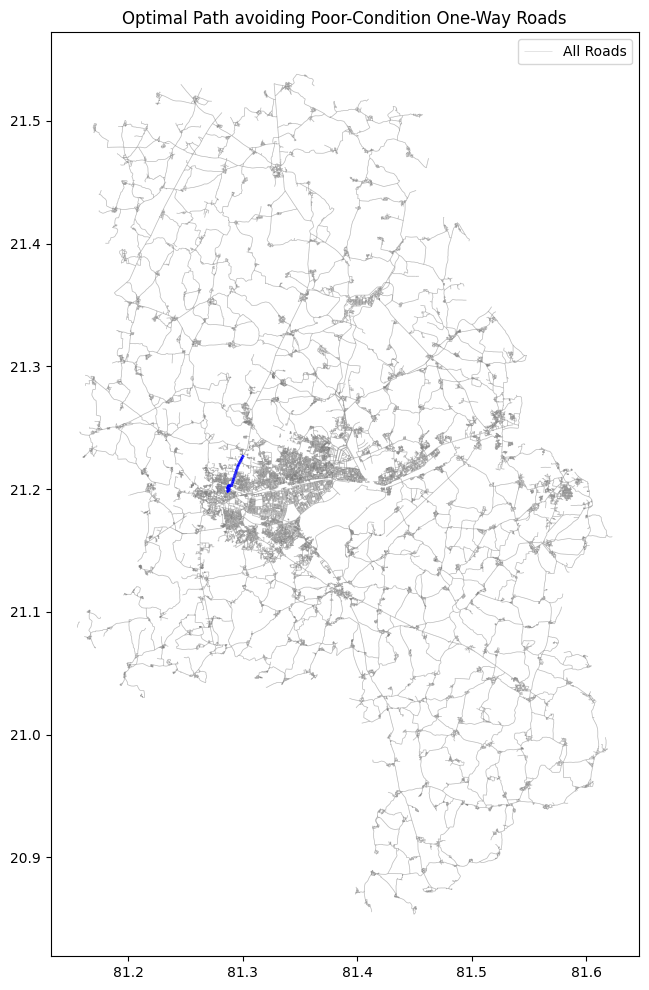

Optimal Path: [(81.3006393, 21.2275182), (81.3000997, 21.2265877), (81.2998765, 21.2261993), (81.2997132, 21.2259152), (81.29895, 21.2245986), (81.298323, 21.2235013), (81.297785, 21.2225832), (81.297528, 21.2221308), (81.2973457, 21.2218098), (81.2974259, 21.2217767), (81.2973734, 21.2216792), (81.2971342, 21.2212747), (81.2966384, 21.2204302), (81.2962693, 21.2197659), (81.2957306, 21.2185016), (81.295654, 21.2185281), (81.2954726, 21.2179285), (81.295395, 21.2177153), (81.2952841, 21.2174106), (81.2950698, 21.216822), (81.2949505, 21.2164947), (81.294743, 21.2159401), (81.2946273, 21.2156244), (81.2945193, 21.2153264), (81.294194, 21.2143842), (81.2942849, 21.2143855), (81.2941328, 21.2139755), (81.294058, 21.2139825), (81.2938765, 21.2135024), (81.2938341, 21.2133911), (81.2936406, 21.2128566), (81.2935805, 21.2126884), (81.2934316, 21.2122666), (81.2933398, 21.2120267), (81.293307, 21.2119371), (81.2930615, 21.2112649), (81.2929122, 21.2108655), (81.2927933, 21.2105431), (81.29272

In [27]:
import random

# Assuming 'oneway_poor_condition_roads' has 'u' and 'v' columns from your previous extraction

# Extract all unique start ('u') and end ('v') nodes
all_nodes = list(set(oneway_poor_condition_roads['u'].tolist() + oneway_poor_condition_roads['v'].tolist()))

# Randomly select two different nodes as start and end
start_node = random.choice(all_nodes)
end_node = random.choice([node for node in all_nodes if node != start_node])  # Ensure start and end are different

# Print the randomly selected start and end nodes
print(f"Randomly selected start node: {start_node}")
print(f"Randomly selected end node: {end_node}")

optimal_path = find_optimal_path(G, start_node, end_node)

# 5. Plot the optimal path
plot_optimal_path(roads, G, optimal_path)

# 6. Print the optimal path if it exists
if optimal_path:
    print(f"Optimal Path: {optimal_path}")
else:
    print("No optimal path found.")


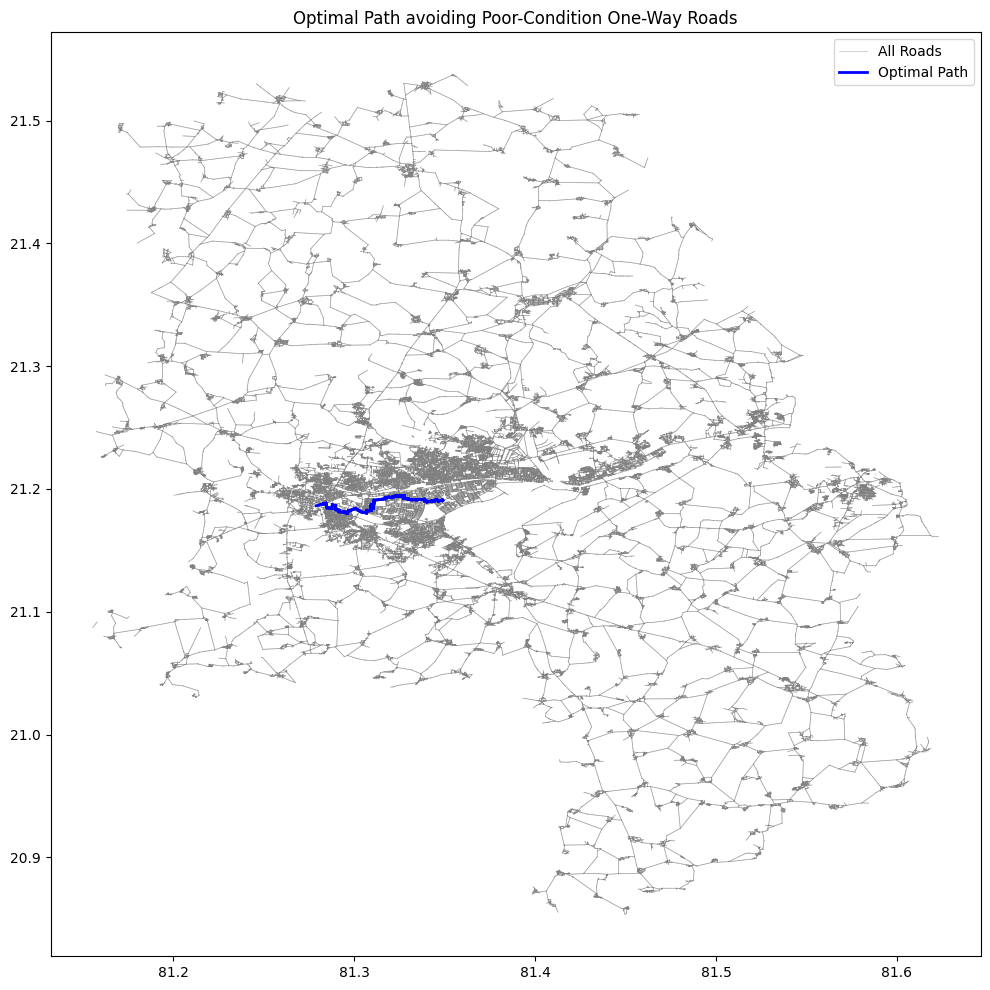

In [25]:
import matplotlib.pyplot as plt

# Step 3: Visualize the entire graph and highlight the optimal path without redundant legend
def visualize_graph_with_optimal_path(roads, G, optimal_path):
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the entire road network (graph edges)
    for idx, row in roads.iterrows():
        u = row['u']
        v = row['v']
        ax.plot([u[0], v[0]], [u[1], v[1]], color='grey', linewidth=0.5, alpha=0.5, label="All Roads")  # Plot all roads

    # Highlight the optimal path if it exists
    if optimal_path:
        path_edges = [(optimal_path[n], optimal_path[n + 1]) for n in range(len(optimal_path) - 1)]

        # Plot the optimal path in a different color (blue)
        for u, v in path_edges:
            segment = roads[((roads['u'] == u) & (roads['v'] == v)) | ((roads['u'] == v) & (roads['v'] == u))]
            for idx, row in segment.iterrows():
                ax.plot([row['u'][0], row['v'][0]], [row['u'][1], row['v'][1]], color='blue', linewidth=2, label="Optimal Path")

    # Remove redundant legend entries
    handles, labels = ax.get_legend_handles_labels()
    unique_handles = []
    unique_labels = []
    for h, l in zip(handles, labels):
        if l not in unique_labels:
            unique_handles.append(h)
            unique_labels.append(l)

    ax.legend(unique_handles, unique_labels)

    plt.title("Optimal Path avoiding Poor-Condition One-Way Roads")
    plt.show()

# Call the visualization function (assuming you already have 'roads', 'G', and 'optimal_path')
visualize_graph_with_optimal_path(roads, G, optimal_path)


In [32]:
# Initialize a counter to track the number of alternative paths found
alternative_paths_count = 0
no_path_segments = 0
node_not_found_segments = 0

for idx, row in oneway_poor_condition_roads.iterrows():
    u, v = row['u'], row['v']

    print(f"Analyzing alternative path for road segment: ({u}, {v})")

    # Check if both nodes exist in the graph before proceeding
    if not G.has_node(u) or not G.has_node(v):
        print(f"Node(s) not found in graph for segment: ({u}, {v})")
        node_not_found_segments += 1
        continue  # Skip to the next iteration

    # Remove the poor-quality road segment from the graph
    if G.has_edge(u, v):
        G.remove_edge(u, v)

    # Try to find an alternative path between 'u' and 'v'
    try:
        # Use Dijkstra's algorithm to find the shortest path, excluding the removed edge
        alternative_path = nx.shortest_path(G, source=u, target=v, weight='weight')
        print(f"Alternative path found: {alternative_path}")
        alternative_paths_count += 1
    except nx.NetworkXNoPath:
        print(f"No alternative path found for segment: ({u}, {v})")
        no_path_segments += 1

    # Optionally, you could add back the removed edge for the next iteration
    G.add_edge(u, v, weight=row['geometry'].length)

# Summary of results
print(f"Number of alternative paths found: {alternative_paths_count}")
print(f"Number of segments with no alternative path: {no_path_segments}")
print(f"Number of segments with NodeNotFound errors: {node_not_found_segments}")

Analyzing alternative path for road segment: ((81.3401824, 21.1733571), (81.3395588, 21.1732984))
Alternative path found: [(81.3401824, 21.1733571), (81.3395414, 21.1734547), (81.3395588, 21.1732984)]
Analyzing alternative path for road segment: ((81.3781277, 21.2017126), (81.3780455, 21.2016365))
Alternative path found: [(81.3781277, 21.2017126), (81.3780188, 21.2019523), (81.3779647, 21.20196), (81.3778778, 21.2019398), (81.3777825, 21.2017704), (81.3778903, 21.2016334), (81.3780455, 21.2016365)]
Analyzing alternative path for road segment: ((81.3654158, 21.1992627), (81.3653765, 21.1993888))
Alternative path found: [(81.3654158, 21.1992627), (81.3656123, 21.1992213), (81.3657124, 21.1993472), (81.365683, 21.1994563), (81.3654463, 21.1994949), (81.3653765, 21.1993888)]
Analyzing alternative path for road segment: ((81.3542117, 21.19396), (81.3541715, 21.1938998))
Alternative path found: [(81.3542117, 21.19396), (81.3563155, 21.1944724), (81.3564755, 21.1940024), (81.3545139, 21.19341

In [38]:
import random
import networkx as nx

# Step 1: Identify nodes with no alternative paths
def find_no_alternative_nodes(G, all_nodes, good_quality_nodes):
    no_alternative_nodes = []
    for node in all_nodes:
        has_alternative_path = False
        for target_node in good_quality_nodes: # good_quality_nodes is a GeoDataFrame. Iterating through it returns the column names
            try:
                # Check if there's a path using good-quality roads
                path = nx.shortest_path(G, source=node, target=target_node, weight='weight') # target_node was a column name. Now it is a node
                if path:
                    has_alternative_path = True
                    break
            except nx.NetworkXNoPath:
                continue  # No path for this node
        if not has_alternative_path:
            no_alternative_nodes.append(node)
    return no_alternative_nodes

# Step 2: Select a random node from nodes with no alternative paths
def select_random_node(no_alternative_nodes):
    return random.choice(no_alternative_nodes)

# Step 3: Find nearby good-quality node
def find_nearby_good_quality_node(G, node, good_quality_nodes, max_distance=1000):
    nearby_nodes = []
    for good_node in good_quality_nodes: # good_quality_nodes is a GeoDataFrame. Iterating through it returns the column names
        if node != good_node:
            try:
                # Check the distance between the nodes
                path_length = nx.shortest_path_length(G, source=node, target=good_node, weight='weight') # target_node was a column name. Now it is a node
                if path_length <= max_distance:
                    nearby_nodes.append(good_node)
            except nx.NetworkXNoPath:
                continue
    return random.choice(nearby_nodes) if nearby_nodes else None

# Step 4: Generate a new road between the selected node and a nearby good-quality node
def generate_new_road(G, node, good_node):
    if good_node:
        G.add_edge(node, good_node, weight=random.uniform(50, 150))  # Add new edge with random weight
        print(f"New road generated between node {node} and node {good_node}.")
    else:
        print(f"No nearby good-quality node found for node {node}.")

# Main function to handle new road generation for nodes without alternative paths
def create_new_roads_for_no_alternative_nodes(G, all_nodes, good_quality_nodes):
    # Identify nodes with no alternative paths
    no_alternative_nodes = find_no_alternative_nodes(G, all_nodes, good_quality_nodes.apply(tuple, axis=1).tolist()) # Convert GeoDataFrame to list of nodes

    if not no_alternative_nodes:
        print("No nodes found with no alternative paths.")
        return

    # Select a random node from those with no alternative paths
    selected_node = select_random_node(no_alternative_nodes)

    # Find a nearby good-quality node
    nearby_good_node = find_nearby_good_quality_node(G, selected_node, good_quality_nodes.apply(tuple, axis=1).tolist()) # Convert GeoDataFrame to list of nodes

    # Generate a new road (if possible)
    generate_new_road(G, selected_node, nearby_good_node)
